# 데이터 병합

In [ ]:
!pip install koreanize-matplotlib
!apt-get update -qq
!apt-get install -y fonts-nanum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 31.9 MB/s eta 0:00:00
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,924 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126374 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing trig

In [ ]:
# 데이터 분석에 필요한 라이브러리를 import
import numpy as np   #넘파이 라이브러리(수치관련)
import pandas as pd  #판다스 라이브러리(데이터분석)
import seaborn as sns #시각화 라이브러리
import matplotlib.pyplot as plt #시각화 라이브러리
import koreanize_matplotlib
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
import os
import matplotlib as mpl
import matplotlib.font_manager as fm

# 설치된 나눔 폰트들 중 기본 고딕을 우선 등록
targets = [
    "/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
    "/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf",
    "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf",
    "/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf",
]
for p in targets:
    if os.path.exists(p):
        fm.fontManager.addfont(p)

# 폰트 캐시 강제 재생성
fm._load_fontmanager(try_read_cache=False)

# 등록 확인
[f.name for f in fm.fontManager.ttflist if "Nanum" in f.name][:10]

['NanumGothic', 'NanumGothic', 'NanumBarunGothic', 'NanumBarunGothic']

In [ ]:
df_spend=pd.read_csv('/content/drive/MyDrive/my_ws/SeSAC_Python/df_wide_final.csv')

In [ ]:
df_spend.head()

,연도,분기,가구구분,소득,가계지출,소비지출,저축액,저축률(%),주거비부담률(%)
0,2024,1분기,근로자가구,7210210.0,5471356.0,3870178.0,3340032.0,46.3,6.0
1,2024,1분기,근로자외가구,4761552.0,3932568.0,3079536.0,1682016.0,35.3,8.7
2,2024,1분기,전체가구,6342673.0,4926178.0,3590061.0,2752612.0,43.4,6.7
3,2024,2분기,근로자가구,6832134.0,5214043.0,3699078.0,3133056.0,45.9,5.7
4,2024,2분기,근로자외가구,4994024.0,3873827.0,3053275.0,1940749.0,38.9,6.7


In [ ]:
df_house=pd.read_csv('/content/drive/MyDrive/my_ws/SeSAC_Python/매매지수_2024분기.csv')

In [ ]:
df_house.head()

,지역,2024_1분기,2024_2분기,2024_3분기,2024_4분기
0,지역,NaN,NaN,NaN,NaN
1,전국,122.800000,123.000000,125.000000,124.733333
2,수도권,141.500000,143.033333,147.100000,147.100000
3,지방,107.233333,106.433333,106.600000,106.166667
4,서울,159.333333,162.500000,170.033333,171.066667


In [ ]:
# 전국 데이터만 필터
df_house_national = df_house[df_house["지역"]=="전국"]

# wide → long 변환
df_house_long = df_house_national.melt(
    id_vars=["지역"],
    var_name="기간",
    value_name="매매지수"
)

# "2024_1분기" → 연도, 분기 분리
df_house_long["연도"] = df_house_long["기간"].str.split("_").str[0].astype(int)
df_house_long["분기"] = df_house_long["기간"].str.split("_").str[1]

# 필요한 컬럼만 정리
df_house_long = df_house_long[["연도","분기","매매지수"]]
df_house_long

,연도,분기,매매지수
0,2024,1분기,122.800000
1,2024,2분기,123.000000
2,2024,3분기,125.000000
3,2024,4분기,124.733333


In [ ]:
df_merged = pd.merge(
    df_spend,
    df_house_long,
    on=["연도","분기"],
    how="inner"
)
df_merged

,연도,분기,가구구분,소득,가계지출,소비지출,저축액,저축률(%),주거비부담률(%),매매지수
0,2024,1분기,근로자가구,7210210.0,5471356.0,3870178.0,3340032.0,46.3,6.0,122.800000
1,2024,1분기,근로자외가구,4761552.0,3932568.0,3079536.0,1682016.0,35.3,8.7,122.800000
2,2024,1분기,전체가구,6342673.0,4926178.0,3590061.0,2752612.0,43.4,6.7,122.800000
3,2024,2분기,근로자가구,6832134.0,5214043.0,3699078.0,3133056.0,45.9,5.7,123.000000
4,2024,2분기,근로자외가구,4994024.0,3873827.0,3053275.0,1940749.0,38.9,6.7,123.000000
5,2024,2분기,전체가구,6175794.0,4735488.0,3468479.0,2707315.0,43.8,6.0,123.000000
6,2024,3분기,근로자가구,7256446.0,5439422.0,3841820.0,3414626.0,47.1,5.0,125.000000
7,2024,3분기,근로자외가구,5275104.0,4072947.0,3123273.0,2151831.0,40.8,6.2,125.000000
8,2024,3분기,전체가구,6555315.0,4955872.0,3587550.0,2967765.0,45.3,5.3,125.000000
9,2024,4분기,근로자가구,6969401.0,5213845.0,3740285.0,3229116.0,46.3,5.3,124.733333


In [ ]:
cols = ["매매지수", "소득", "가계지출", "소비지출", "저축률(%)", "주거비부담률(%)"]
corr = df_merged[cols].corr()
corr

,매매지수,소득,가계지출,소비지출,저축률(%),주거비부담률(%)
매매지수,1.000000,0.133420,0.057342,0.081586,0.214592,-0.473221
소득,0.133420,1.000000,0.993842,0.991260,0.969760,-0.806178
가계지출,0.057342,0.993842,1.000000,0.995488,0.944467,-0.742405
소비지출,0.081586,0.991260,0.995488,1.000000,0.931994,-0.727598
저축률(%),0.214592,0.969760,0.944467,0.931994,1.000000,-0.912728
주거비부담률(%),-0.473221,-0.806178,-0.742405,-0.727598,-0.912728,1.000000


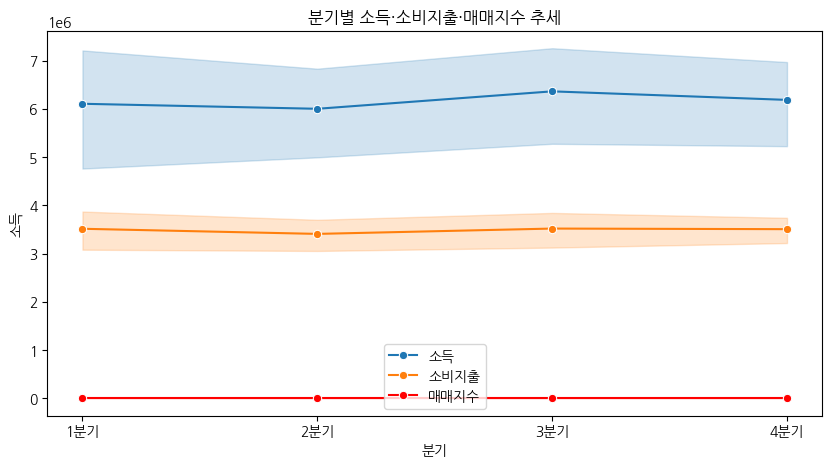

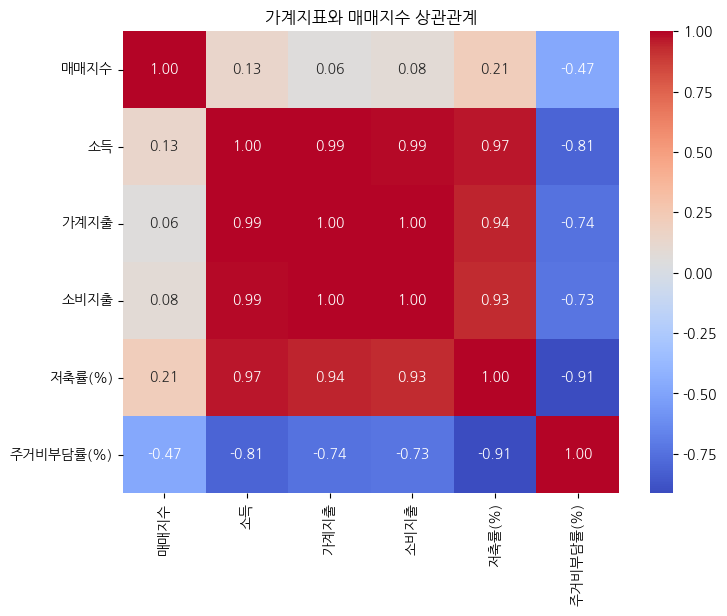

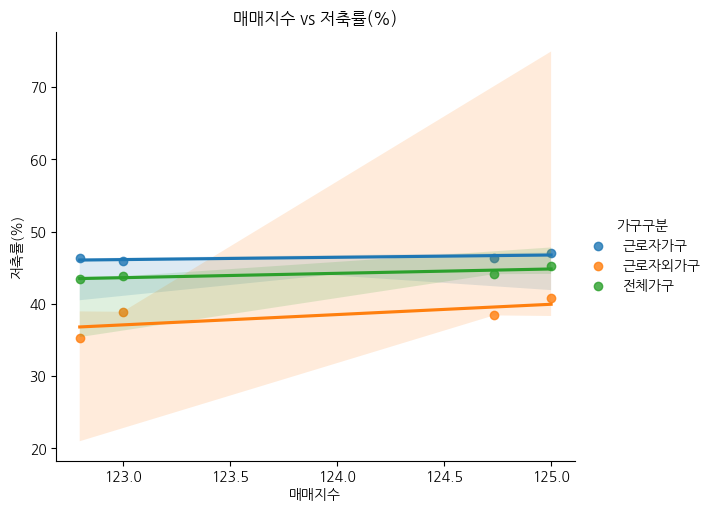

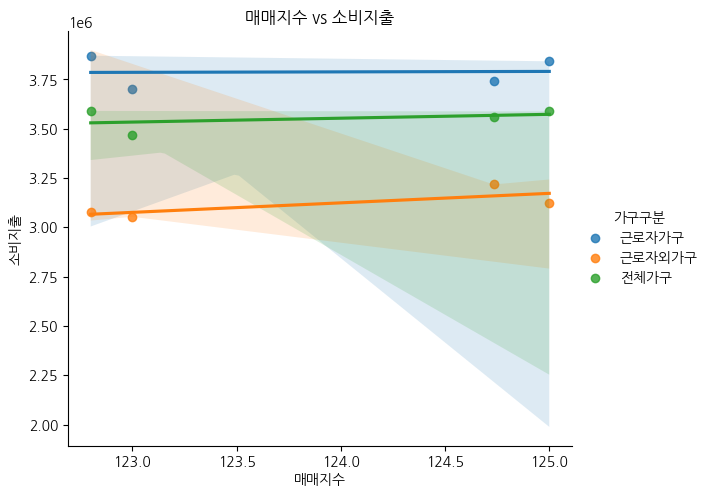

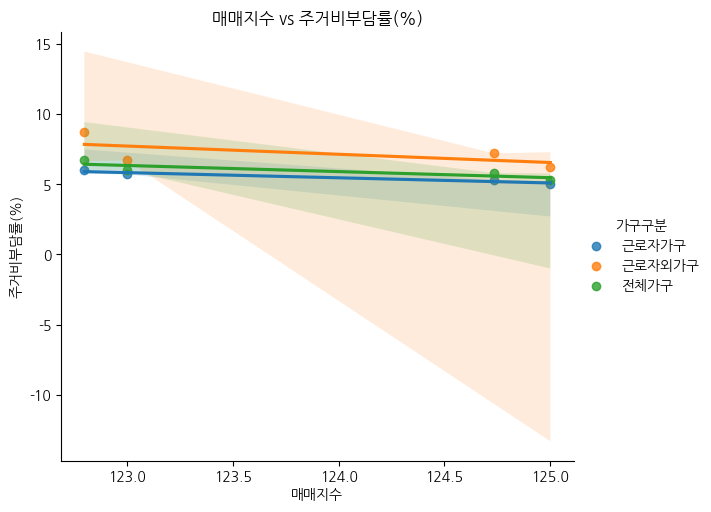

                            OLS Regression Results                            
Dep. Variable:                 저축률(%)   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                    0.4827
Date:                Thu, 11 Sep 2025   Prob (F-statistic):              0.503
Time:                        05:26:05   Log-Likelihood:                -32.149
No. Observations:                  12   AIC:                             68.30
Df Residuals:                      10   BIC:                             69.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -53.9367    139.477     -0.387      0.7

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# ==========================================
# 1. 추세 비교 (소득·소비 vs 매매지수)
# ==========================================
plt.figure(figsize=(10,5))
sns.lineplot(data=df_merged, x="분기", y="소득", marker="o", label="소득")
sns.lineplot(data=df_merged, x="분기", y="소비지출", marker="o", label="소비지출")
sns.lineplot(data=df_merged, x="분기", y="매매지수", marker="o", label="매매지수", color="red")
plt.title("분기별 소득·소비지출·매매지수 추세")
plt.legend()
plt.show()

# ==========================================
# 2. 상관관계 분석 (Heatmap)
# ==========================================
cols = ["매매지수","소득","가계지출","소비지출","저축률(%)","주거비부담률(%)"]
corr = df_merged[cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("가계지표와 매매지수 상관관계")
plt.show()

# ==========================================
# 3. 산점도 + 회귀선 (탐색적 시각화)
# ==========================================
sns.lmplot(data=df_merged, x="매매지수", y="저축률(%)", hue="가구구분", aspect=1.2)
plt.title("매매지수 vs 저축률(%)")
plt.show()

sns.lmplot(data=df_merged, x="매매지수", y="소비지출", hue="가구구분", aspect=1.2)
plt.title("매매지수 vs 소비지출")
plt.show()

sns.lmplot(data=df_merged, x="매매지수", y="주거비부담률(%)", hue="가구구분", aspect=1.2)
plt.title("매매지수 vs 주거비부담률(%)")
plt.show()

# ==========================================
# 4. 회귀분석 (탐색적 모델링)
# ==========================================
# 예시: 저축률(%) ~ 매매지수
X = df_merged[["매매지수"]]
y = df_merged["저축률(%)"]
X = sm.add_constant(X)  # 절편 추가
model = sm.OLS(y, X).fit()
print(model.summary())

# 예시: 소비지출 ~ 매매지수 + 소득
X2 = df_merged[["매매지수","소득"]]
y2 = df_merged["소비지출"]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y2, X2).fit()
print(model2.summary())
